# Elastix

This notebooks show very basic image registration examples with on-the-fly generated binary images.

In [2]:
from itk import itkElastixRegistrationMethodPython
from itk import itkTransformixFilterPython
import itk
import numpy as np
import matplotlib.pyplot as plt

## Image generators

In [3]:
def image_generator(x1, x2, y1, y2, upsampled=False, bspline=False,
                   mask=False, artefact=False):
    if upsampled:
        image = np.zeros([1000, 1000], np.float32)
    elif mask:
        image = np.zeros([100, 100], np.uint8)
    else:
        image = np.zeros([100, 100], np.float32)
    for x in range(x1, x2):
        for y in range(y1, y2):
            if bspline:
                y += x
                if x > 99 or y > 99:
                    pass
                else:
                    image[x, y] = 1
            else:
                image[x, y] = 1
    if artefact:
        image[:, -10:] = 1
    image = itk.image_view_from_array(image)
    return image

## Rigid Test

In [4]:
# Create rigid transformed test images
fixed_image = image_generator(25,75,25,75)
moving_image = image_generator(1,51,10,60)

# Import Default Parameter Map
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

In [5]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=True)

### Visualization Rigid Test

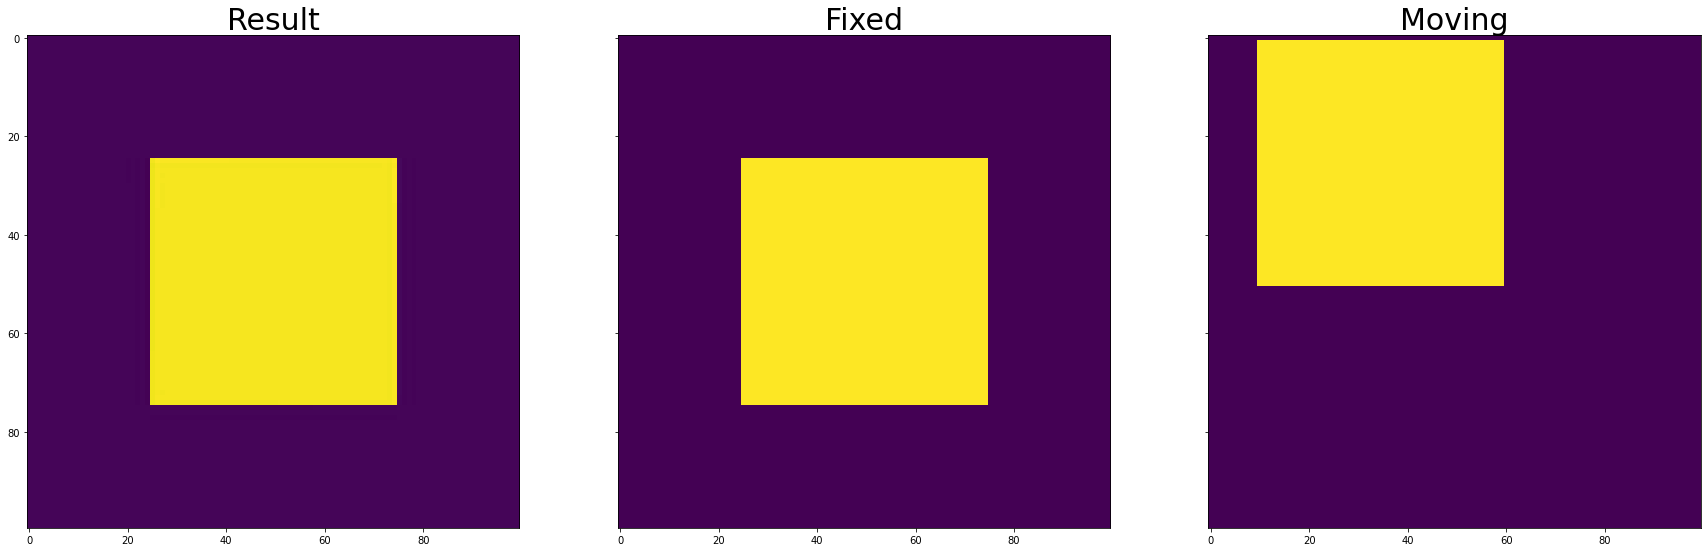

In [6]:
%matplotlib inline

# Plot images
fig, axs = plt.subplots(1,3, sharey=True, figsize=[30,30])
plt.figsize=[100,100]
axs[0].imshow(result_image)
axs[0].set_title('Result', fontsize=30)
axs[1].imshow(fixed_image)
axs[1].set_title('Fixed', fontsize=30)
axs[2].imshow(moving_image)
axs[2].set_title('Moving', fontsize=30)
plt.show()